<center>
<img src="../img/ods_stickers.jpg">
## LOF algorithm for outlier detection
<center>
Author: Daniil Chepenko

# Theory

Outlier detection (also known as anomaly detection) is the process of finding data
objects with behaviors that are very different from expectation. Such objects are called
outliers or anomalies. 

The most interesting objects are those, that deviates significantly from the normal object. Outliers are not being generated by the same mechanism as rest of the data.

<center>
<img src="./tutorial/oZH4bQS.png">
<i>Income and wealth inequality in various countries. South Korea, China, Japan, Denmark, Zimbabwe and Nambia cases requires further studies.</i>
<center>

Outlier detection is important in many applications, such as:
- Fraud in financial data
- Intrusions in communication networks
- Fake news and misinformation
- Healthcare analysis
- Industry damage detection
- Security and surveillance
- etc

Outlier detection and clustering analysis are two highly related tasks. Clustering finds
the majority patterns in a data set and organizes the data accordingly, whereas outlier
detection tries to capture those exceptional cases that deviate substantially from the
majority patterns.


## Outliers and noisy data
Outliers differes from the noisy data. 

Moreover it should be removed while applying outlier detection. Noise may distort the normal objects and blur the distinction between normal objects and outliers. It may help hide outliers and reduce the effectiveness of outlier detection. For example, if a user consider of buying more expensive lunch that he used to buy usually, this behavior should be treated as a “noise transactions” like “random errors” or “variance”.


## Types of outliers
In general, outliers can be classified into three categories, namely global outliers, contextual
(or conditional) outliers, and collective outliers.

- Global outlier - Object significantly deviates from the rest of the data set
- Contextual outlier - Object deviates significantly based on a selected context. For example, 28C is an outlier for a Moscow winter, but not an outlier in another context, 28C is not an outlier for a Moscow summer.
- Collective outlier - A subset of data objects collectively deviate significantly from the whole data set, even if the individual data objects may not be outliers. For example, a collective outlier occurs when a number of computers keep sending denial-of-service packages to each other.

Usually, a data set may contains different types of outliers and at the same time may belong to more than one type of outlier.


## Outlier Detection Methods
There are many outlier detection methods in the literature and in practice. Firstly the outlier detection methods differs according to whether the sample of data for analysis is given with domain expert–provided labels that can be used to build an outlier detection model. Secondly, methods can be divided into groups according to their assumptions regarding normal objects versus outliers.

If expert-labeled examples of normal and/or outlier objects can be obtained, they can be
used to build outlier detection models. The methods used can be divided into supervised methods, semi-supervised methods, and unsupervised methods.



### Supervised method
Modeling outlier detection as a classification problem. Samples examined by domain experts used for training & testing.

Challenges:
- Classes are unbalanced. That is, the population of outliers is typically much smaller than that of normal objects. Methods for handling unbalanced classes can be used.
- Catch as many outliers as possible, i.e., recall is more important than accuracy (i.e., not mislabeling normal objects as outliers)


### Unsupervised method
In some application scenarios, objects labeled as “normal” or “outlier” are not available.
Thus, an unsupervised learning method has to be used.
Unsupervised outlier detection methods make an implicit assumption: The normal
objects are somewhat “clustered.” In other words, an unsupervised outlier detection
method expects that normal objects follow a pattern far more frequently than outliers.

Challenges:
Unsupervised methods can’t detect collective outlier effectively. This assumption may not be true all the time.
- Normal objects may not share any strong patterns, but the collective outliers may share high similarity in a small area

For example in some intrusion or virus detection, normal activities are diverse
- Unsupervised methods may have a high false positive rate but still miss many real outliers.
- Supervised methods can be more effective, e.g., identify attacking some key resources


### Semi-Supervised Methods

In many applications, although obtaining some labeled examples is feasible, the number
of such labeled examples is often small. 
If some labeled normal objects are available:
- Use the labeled examples and the proximate unlabeled objects to train a model for normal objects
- Those not fitting the model of normal objects are detected as outliers

If only some labeled outliers are available, a small number of labeled outliers may not cover the possible outliers well.


### Statistical methods

Statistical methods (also known as model-based methods) assume that the normal data follow some statistical model (a stochastic model). The idea is to learn a generative model fitting the given data set, and then identify the objects in low probability regions of the model as outliers.


#### Parametric methods
A parametric method assumes that the normal data objects are generated by a parametric
distribution with parameter $\theta$. The probability density function of the parametric
distribution $f (x,2)$ gives the probability that object x is generated by the distribution.
The smaller this value, the more likely x is an outlier


In [6]:
import numpy as np

In [7]:
avg_temp = np.array([24.0, 28.9, 28.9, 29.0, 29.1, 29.1, 29.2, 29.2, 29.3, 29.4])

We can use the maximum likelihood method to estimate the parameters μ and ". That is, we maximize the log-likelihood function

$$lnL(\mu,\sigma^2) = \sum_{i=1}^{n}lnf[x_i|(\mu,\sigma^2)] = -\frac{n}{2}ln(2\pi) -\frac{n}{2}ln(2\sigma) - \frac{1}{2\sigma^2} \sum_{i=1}^{n}(x_i-\mu)^2$$

Taking derivatives with respect to μ and "2 and solving the resulting system of first-order conditions leads to the following maximum likelihood estimates:

In [14]:
mean = avg_temp.mean()
std = avg_temp.std()
sigma = (avg_temp.min() - avg_temp.max())/std
print mean, std, sigma

28.61 1.54431214461 -3.49670241138


The most deviating value, 24.0"C, is 4.61"C away from the estimated mean. We know that the $\mu±3$ region contains 99.7% data under the assumption of normal distribution

$\sigma < -3 $. Then 24 is outlier 

The main drawback for parametric model is that in many cases, data distribution may not be known

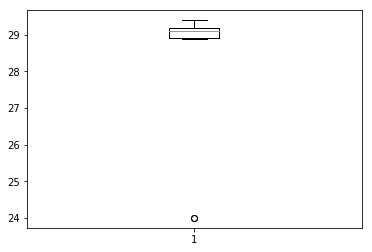

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(avg_temp)
plt.show()

For multivariative data other methods are used. For example, we can compute Mahalaobis distance or use $\chi^2$ statistics

#### Nonparametric methods
In nonparametric methods for outlier detection, the model of “normal data” is learned
from the input data, rather than assuming one a priori. Nonparametric methods often
make fewer assumptions about the data, and thus can be applicable in more scenarios. 
As an example we can use histograms


### Proximity-Based Approaches

Given a set of objects in feature space, a distance measure can be used to quantify the
similarity between objects. Intuitively, objects that are far from others can be regarded
as outliers. Proximity-based approaches assume that the proximity of an outlier object
to its nearest neighbors significantly deviates from the proximity of the object to most
of the other objects in the data set.

#### Distance-based 
Distance-based outlier detection method consults the neighborhood of an object, which is defined by a given radius. An object is then considered
an outlier if its neighborhood does not have enough other points.

Formally, let $r (r > 0)$ be a distance threshold and $\pi (0< \pi < 1)$ be a fraction
    threshold. An object, o, is a $DB(r,\pi)$-outlier if $$\frac{||{o'|dist(o,o')\leq r||}}{||D||} \leq \pi $$
where $dist(o,o')$ is a distance measure

Algorithms for mining distance-based outliers:
- Index-based algorithm
- Nested-loop algorithm
- Cell-based algorithm

#### Density-based
Density-based outlier detection method investigates the density of an object and that of its neighbors.
Here, an object is identified as an outlier if its density is relatively much lower than that
of its neighbors.

Many real-world data sets demonstrate a more complex structure, where objects
may be considered outliers with respect to their local neighborhoods, rather than with
respect to the global data distribution.

<center>
<img src="./tutorial/density_based.png">
<i>Is o1 and o2 be considered as an outliers?</i>
<center>

Distanse-based methods are not able to detect $o_1$ and $o_2$ as an outlier. However, when they are considered
locally with respect to cluster $C_1$ because $o_1$ and $o_2$ deviate significantly from the objects
in $C_1$. Moreover, $o_1$ and $o_2$ are also far from the objects in $C_2$.

The critical
idea here is that we need to compare the density around an object with the density
around its local neighbors. The basic assumption of density-based outlier detection
methods is that the density around a nonoutlier object is similar to the density around
its neighbors, while the density around an outlier object is significantly different from
the density around its neighbors.

$dist_k(o)$ -is a distance between object $o$ and k-nearest neighbors. The k-distance neighborhood of $o$ contains all objects of which the distance to $o$ is not greater that $dist_k(o)$ , the $k$-distance of $o$

$$N_k(o)= [o'|o' \in D, dist(o,o') \leq dist_k(o)]$$

We can use the average distance from the objects in $N_k(o)$ to o as the measure of the local density of $o$. If $o$ has very close neighbors $o'$ such that $dist(o, o')$ is very small, the statistical fluctuations of the
distance measure can be undesirably high. To overcome this problem, we can switch to the following reachability distance measure by adding a smoothing effect.

$$reachdist_k(o,o') = max[dist_k(o), dist(o,o')]$$

$k$ is a user-specified parameter that controls the smoothing effect. Essentially, $k$
specifies the minimum neighborhood to be examined to determine the local density
of an object.Reachability distance is not symmetric.

Local reachability density of an object $o$ is $$lrd_k(o) = \frac{||N_k(o)||}{\sum_{o' \in N_k(o)}reachdist_k(o,o')}$$

We calculate the local reachability density for an object
and compare it with that of its neighbors to quantify the degree to which the object is
considered an outlier.

$$LOF_k(o) = \frac{\sum_{o'\in N_k(o)} \frac{lrd_k(o')}{lrd_k(o)} }{||N_k(o)||} = \sum_{o' \in N_k(o)}lrd_k(o')* \sum_{o' \in N_k(o)}reachdist_k(o',o)$$

Local outlier factor is the average of the ratio of the local reachability
density of o and those of $o’$ s $k$-nearest neighbors. The lower the local reachability density
of $o$ and the higher the local
reachability densities of the $k$-nearest neighbors of o, the higher the LOF value is. This
exactly captures a local outlier of which the local density is relatively low compared to
the local densities of its k-nearest neighbors.

The meaning of LOF is easy to understand.
<center>
<img src="./tutorial/lof.png">
<i>A property of LOF($o$)</i>
<center>

The minimum reachability distance from o to its k-nearest neighbors
$$direct_{min}(o) = min[reachdist_k(o',o)|o' \in N_k(o)]$$

While the maximum can be defined as follows:
$$direct_{max}(o) = max[reachdist_k(o',o)|o' \in N_k(o)]$$

We also consider the neighbors of o' k-nearest neighbors
$$indirect_{min}(o) = min[reachdistk(o'',o')|o' \in N_k(o) \text{ and } o'' \in N_k(o')]$$

and 
$$indirect_{max}(o) = max[reachdistk(o'',o')|o' \in N_k(o) \text{ and } o'' \in N_k(o')]$$

Then LOF(o) is bounded as

$$\frac{direct_{min}(o)}{indirect_{max}(o)} \leq LOF(o) \leq \frac{direct_{max}(o)}{indirect_{min}(o)}$$

# Outlier detection with LOF

Based on the clickstream event frequency pattern in data.csv, we will apply LOF algorithm to
calculate LOF for each point with the following initial settings:
1. k = 2 and use Manhattan distance. 
2. k = 3 and use Euclidean distance.


As the result, we will find 5 outliers and their $LOF_k(o)$

In [18]:
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [20]:
data_input = pd.read_csv('./tutorial/data.csv')

In [21]:
data_input.head()

,user_id,load_video,pause_video,play_video,seek_video,speed_change_video,stop_video
0,0,2.0,1.0,4.0,1.0,0.0,1.0
1,1,6.0,14.0,14.0,0.0,0.0,1.0
2,2,1.0,0.0,0.0,0.0,0.0,0.0
3,3,2.0,2.0,2.0,0.0,0.0,1.0
4,4,1.0,3.0,22.0,18.0,0.0,0.0


In [22]:
#Reachdist function
def reachdist(distance_df, observation, index):
    return distance_df[observation][index]

In [23]:
#LOF algorithm implementation from scratch
def LOF_algorithm(data_input, distance_metric = "cityblock", p = 5):
    distances = pdist(data_input.values, metric=distance_metric)
    dist_matrix = squareform(distances)
    distance_df = pd.DataFrame(dist_matrix)
    
    k = 2 if distance_metric == "cityblock" else 3 
    observations = distance_df.columns
    lrd_dict = {}
    n_dist_index = {}
    reach_array_dict = {}
    
    for observation in observations:
        dist = distance_df[observation].nsmallest(k+1).iloc[k]
        indexes = distance_df[distance_df[observation] <= dist].drop(observation).index
        n_dist_index[observation] = indexes
    
        reach_dist_array = []
        for index in indexes:
            #make a function reachdist(observation, index)
            dist_between_observation_and_index = reachdist(distance_df, observation, index)
            dist_index =  distance_df[index].nsmallest(k+1).iloc[k]
            reach_dist = max(dist_index, dist_between_observation_and_index)
            reach_dist_array.append(reach_dist)
        lrd_observation = len(indexes)/sum(reach_dist_array)
        reach_array_dict[observation] = reach_dist_array
        lrd_dict[observation] = lrd_observation
        
    #Calculate LOF
    LOF_dict = {}
    for observation in observations:
        lrd_array = []
        for index in n_dist_index[observation]:
            lrd_array.append(lrd_dict[index])
        LOF = sum(lrd_array)*sum(reach_array_dict[observation])/np.square(len(n_dist_index[observation]))
        LOF_dict[observation] = LOF

    return sorted(LOF_dict.items(), key=lambda x: x[1], reverse=True)[:p]

In [24]:
LOF_algorithm(data_input, p = 5)

[(19, 11.07),
 (525, 8.8672286617492091),
 (66, 5.0267857142857144),
 (638, 4.3347272196829723),
 (177, 3.6292633292633294)]

In [25]:
LOF_algorithm(data_input, p = 5, distance_metric = 'euclidean')

[(638, 3.0800716645705695),
 (525, 3.0103162562616288),
 (19, 2.8402916620868903),
 (66, 2.8014102661691211),
 (65, 2.6456528412196416)]